In [423]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [424]:
class LR_BGD():
  
  # initialization of model's parameters
  def __init__(self, n_iter=100, rate=0.001):
    self.n_iter = n_iter
    self.rate = rate
    
  # fitting model by updating weights during minimization of SSE
  def fit(self, X, y):
    self.cf_values = []
    self.m, self.n = X.shape[0], X.shape[1]
    self._w = np.zeros(shape=(self.n + 1, 1), dtype=float)
    for iter in range(1, self.n_iter + 1):
    # evaluating gradient, bias and updating wheights uing learning rule
      for idx, w in enumerate(self._w[1:]):
        grad = -1 * sum([(yi - self.predict(xi)) * xi[idx] for xi, yi in zip(X, y)])
        bias = sum([(yi - self.predict(xi)) for xi, yi in zip(X, y)])
        w[0] -= self.rate * grad
        self._w[0][0] += self.rate * bias
    # check if the algh converged and cf vaue on each iteration
      cf = self._evaluate_cf(X, y)
      self.cf_values.append(cf)
      print(f"Iteration №{iter}: Value of objective function = {cf}")
    return self

  # evalueation of cost function value
  def _evaluate_cf(self, X, y):
    return 1/2 * sum([(self.predict(xi) - yi)**2 for xi, yi in zip(X, y)])

  # return continious num (target). Making hypothesis
  def predict(self, xi):
    return np.dot(xi, self._w[1:]) + self._w[0][0]

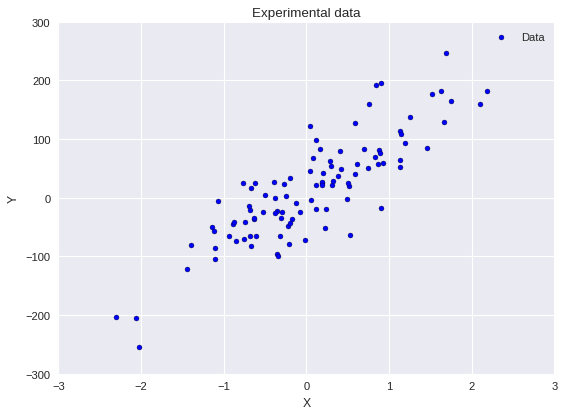

In [425]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=50, random_state=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Experimental data')
plt.scatter(X, y, label='Data')
plt.legend()
plt.style.use('_classic_test_patch')

In [426]:
lrm = LR_BGD()
lrm.fit(X, y)

Iteration №1: Value of objective function = [353523.53984925]
Iteration №2: Value of objective function = [314688.66554168]
Iteration №3: Value of objective function = [281964.18764377]
Iteration №4: Value of objective function = [254376.16954112]
Iteration №5: Value of objective function = [231108.18416673]
Iteration №6: Value of objective function = [211475.43283274]
Iteration №7: Value of objective function = [194903.18887762]
Iteration №8: Value of objective function = [180908.83088111]
Iteration №9: Value of objective function = [169086.85734548]
Iteration №10: Value of objective function = [159096.37953961]
Iteration №11: Value of objective function = [150650.67563874]
Iteration №12: Value of objective function = [143508.46063542]
Iteration №13: Value of objective function = [137466.58542274]
Iteration №14: Value of objective function = [132353.92715574]
Iteration №15: Value of objective function = [128026.27328218]
Iteration №16: Value of objective function = [124362.03497938]
I

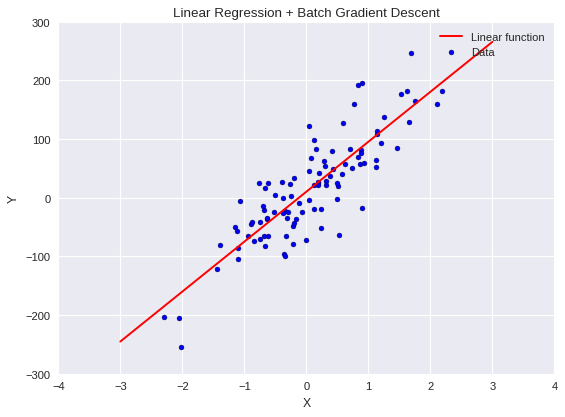

In [427]:
X_test = np.array([[-3], [3]])
y_test = np.array([lrm.predict(x) for x in X_test])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression + Batch Gradient Descent')
plt.plot(X_test, y_test, color='red', label='Linear function')
plt.scatter(X, y, label='Data')
plt.legend()